#Initialization

##Install Libs

In [ ]:
!pip install kaggle

In [ ]:
!pip install PyYAML

##imports

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

##Acces Dataset

###Access to Kaggle

In [ ]:
import os

# CHAN GE BOTH THE USERNAME AND KEY TO YOUR

# Replace 'your_kaggle_username' and 'your_kaggle_key' with your actual Kaggle API username and key from kaggle.json
os.environ['KAGGLE_USERNAME'] = 'yankarlogranados'
os.environ['KAGGLE_KEY'] = '1b85c9fdcb56ea0215b2667dd092a0a9'

In [ ]:
!kaggle datasets download -d thepbordin/indoor-object-detection

 98% 361M/367M [00:05<00:00, 114MB/s]
100% 367M/367M [00:05<00:00, 66.9MB/s]


In [ ]:
!unzip indoor-object-detection.zip

Archive:  indoor-object-detection.zip
  inflating: data.yaml               
  inflating: test/images/1003.png    
  inflating: test/images/1014.png    
  inflating: test/images/1015.png    
  inflating: test/images/1020.png    
  inflating: test/images/1021.png    
  inflating: test/images/1023.png    
  inflating: test/images/1026.png    
  inflating: test/images/1027.png    
  inflating: test/images/1028.png    
  inflating: test/images/1029.png    
  inflating: test/images/1032.png    
  inflating: test/images/1034.png    
  inflating: test/images/1040.png    
  inflating: test/images/1043.png    
  inflating: test/images/1045.png    
  inflating: test/images/1047.png    
  inflating: test/images/1048.png    
  inflating: test/images/1052.png    
  inflating: test/images/1054.png    
  inflating: test/images/1055.png    
  inflating: test/images/1058.png    
  inflating: test/images/1065.png    
  inflating: test/images/1069.png    
  inflating: test/images/1071.png    
  inflating:

###Set up img and label folders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

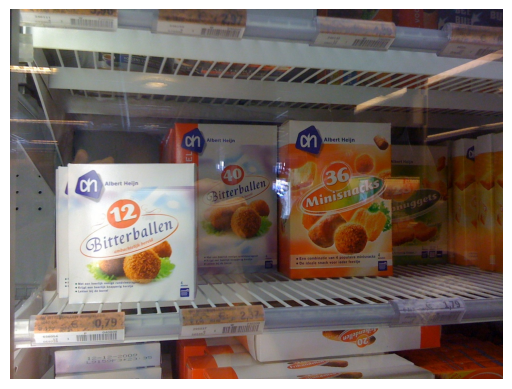

979c63d91223211c.txt
Label:



In [ ]:
# Set the path to the 'train' folder
train_folder = 'train'

# Set the path to the sub-folders for images and labels
images_folder = os.path.join(train_folder, 'images')
labels_folder = os.path.join(train_folder, 'labels')

# List all image files in the 'images' folder
image_files = os.listdir(images_folder)

# Pick one image file from the 'images' folder (you can change the index as per your choice)
image_file = os.path.join(images_folder, image_files[1])

# Load and display the image
img = mpimg.imread(image_file)
plt.imshow(img)
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

# Assuming the labels have the same filename as the corresponding image but with a different extension (e.g., .txt)
label_file = os.path.splitext(image_files[1])[0] + '.txt'
label_path = os.path.join(labels_folder, label_file)

print(label_file)

# Load and display the content of the label file
with open(label_path, 'r') as label_file:
    label_content = label_file.read()
    print("Label:")
    print(label_content)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

###Get Label Types

In [ ]:
import yaml

# Path to the YAML file
yaml_file_path = 'data.yaml'

# Load the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_data = yaml.safe_load(file)

print(yaml_data['names'])

['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']


In [ ]:
print(len(yaml_data['names']))

10


###Delete dir(just in case)

In [ ]:
# import os
# import shutil



# # Specify the directory you want to delete
# output_train_dir = 'output_val'

# # Remove the directory and its contents
# # shutil.rmtree(output_train_dir)#remove and recreate

# # Recreate an empty directory
# # os.makedirs(output_train_dir)


# # Specify the directory you want to delete
# output_train_dir = 'output_test'

# # Remove the directory and its contents
# # shutil.rmtree(output_train_dir)

# # Recreate an empty directory
# # os.makedirs(output_train_dir)

# # Specify the directory you want to delete
# # output_train_dir = 'output_train'

# # Remove the directory and its contents
# # shutil.rmtree(output_train_dir)

# # Recreate an empty directory
# os.makedirs(output_train_dir)


In [ ]:
import os
import cv2
import pandas as pd

# Set the path to the 'train' folder
train_folder = 'train'

# Set the path to the sub-folders for images and labels
images_folder = os.path.join(train_folder, 'images')
labels_folder = os.path.join(train_folder, 'labels')

# Initialize a list to store cropped image information
data = []

# Define output directory for cropped images
output_dir = 'output_train'
os.makedirs(output_dir, exist_ok=True)

# Get a list of all image files in the images folder
image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

# Process each image
for image_file in image_files:
    try:
        # Load the image
        image_path = os.path.join(images_folder, image_file)
        image = cv2.imread(image_path)

        if image is None:
            raise Exception(f"Failed to load image: {image_path}")

        # Parse YOLOv5-style label file
        label_file = image_file.replace('.jpg', '.txt')
        label_path = os.path.join(labels_folder, label_file)

        # Check if the label file exists
        if not os.path.exists(label_path):
            print(f"Label file not found: {label_path}. Skipping image.")
            continue

        with open(label_path, 'r') as f:
            lines = f.readlines()

        # Process each bounding box and crop
        for line in lines:
            parts = line.strip().split()
            label = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            # Calculate bounding box coordinates in pixels
            x_min = int((x_center - width / 2) * image.shape[1])
            y_min = int((y_center - height / 2) * image.shape[0])
            x_max = int((x_center + width / 2) * image.shape[1])
            y_max = int((y_center + height / 2) * image.shape[0])

            if x_min < 0 or y_min < 0 or x_max > image.shape[1] or y_max > image.shape[0]:
                raise Exception("Invalid bounding box coordinates")

            # Crop the bounding box region
            cropped_image = image[y_min:y_max, x_min:x_max]

            # Save the cropped image
            output_path = os.path.join(output_dir, f'cropped_{image_file}_{label}_{x_min}_{y_min}.jpg')
            cv2.imwrite(output_path, cropped_image)

            # Append information to the list
            data.append({'image_path': output_path, 'label': label})
    except Exception as e:
        print(f"Error processing {image_file}: {str(e)}")

# Create a DataFrame from the list of dictionaries
df_train = pd.DataFrame(data)

# Display the DataFrame
df_train.head()

Label file not found: train/labels/62fbb8ea21b31940.txt. Skipping image.
Error processing a30d502fade25820.jpg: OpenCV(4.8.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Label file not found: train/labels/23e9876d80301685.txt. Skipping image.
Error processing 0c30772b7ea51745.jpg: OpenCV(4.8.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Label file not found: train/labels/506bd74062053978.txt. Skipping image.
Label file not found: train/labels/acafde3057686f65.txt. Skipping image.


,image_path,label
0,output_train/cropped_32a5a75aff331bbc.jpg_1_63...,1
1,output_train/cropped_32a5a75aff331bbc.jpg_1_62...,1
2,output_train/cropped_32a5a75aff331bbc.jpg_1_63...,1
3,output_train/cropped_32a5a75aff331bbc.jpg_1_64...,1
4,output_train/cropped_32a5a75aff331bbc.jpg_1_63...,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['image_path'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['index', 'image_path'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['index', 'count()', 'image_path'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['label', 'count()', 'image_path'], **{})
chart

###Organize img to Labels

In [ ]:
# Group the original DataFrame by the 'label' column
grouped = df_train.groupby('label')

# Create a new DataFrame to store the sampled instances
sampled_df = pd.DataFrame(columns=df_train.columns)

# Sample instances from each group (label) based on the specified criteria
for label, group in grouped:
    group_size = len(group)

    if group_size > 400:
        sample_size = int(0.2 * group_size)  # Take 70% of the instances
    else:
        sample_size = group_size  # Take 100% of the instances if group size <= 200

    sampled_group = group.sample(n=sample_size, random_state=42)  # Sample instances
    sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index of the new DataFrame
sampled_df.reset_index(drop=True, inplace=True)

# Now, 'sampled_df' contains the desired samples from each group
print(sampled_df.label.value_counts())
print(sampled_df.head())

1    626
3    393
5    212
4    185
6    176
2    137
0     93
8     77
9     27
7     24
Name: label, dtype: int64
                                          image_path label
0  output_train/cropped_66fa65d19adaa351.jpg_0_7_...     0
1  output_train/cropped_0bda614ac5f8d5bb.jpg_0_28...     0
2  output_train/cropped_0cda59918e7dee1c.jpg_0_64...     0
3  output_train/cropped_0dc08fe92b930864.jpg_0_32...     0
4  output_train/cropped_0e04b7fb9fa3c60c.jpg_0_27...     0


###Dividing imgs into training,test^val

In [ ]:
import os
import cv2
import pandas as pd

# Set the path to the 'train' folder
train_folder = 'test'

# Set the path to the sub-folders for images and labels
images_folder = os.path.join(train_folder, 'images')
labels_folder = os.path.join(train_folder, 'labels')

# Initialize a list to store cropped image information
data = []

# Define output directory for cropped images
output_dir = 'output_test'
os.makedirs(output_dir, exist_ok=True)

# Get a list of all image files in the images folder
image_files = [f for f in os.listdir(images_folder) if f.endswith('.png')]

# Process each image
for image_file in image_files:
    try:
        # Load the image
        image_path = os.path.join(images_folder, image_file)
        image = cv2.imread(image_path)

        if image is None:
            raise Exception(f"Failed to load image: {image_path}")

        # Parse YOLOv5-style label file
        label_file = image_file.replace('.png', '.txt')
        label_path = os.path.join(labels_folder, label_file)

        # Check if the label file exists
        if not os.path.exists(label_path):
            print(f"Label file not found: {label_path}. Skipping image.")
            continue

        with open(label_path, 'r') as f:
            lines = f.readlines()

        # Process each bounding box and crop
        for line in lines:
            parts = line.strip().split()
            label = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            # Calculate bounding box coordinates in pixels
            x_min = int((x_center - width / 2) * image.shape[1])
            y_min = int((y_center - height / 2) * image.shape[0])
            x_max = int((x_center + width / 2) * image.shape[1])
            y_max = int((y_center + height / 2) * image.shape[0])

            if x_min < 0 or y_min < 0 or x_max > image.shape[1] or y_max > image.shape[0]:
                raise Exception("Invalid bounding box coordinates")

            # Crop the bounding box region
            cropped_image = image[y_min:y_max, x_min:x_max]

            # Save the cropped image
            output_path = os.path.join(output_dir, f'cropped_{image_file}_{label}_{x_min}_{y_min}.jpg')
            cv2.imwrite(output_path, cropped_image)

            # Append information to the list
            data.append({'image_path': output_path, 'label': label})
    except Exception as e:
        print(f"Error processing {image_file}: {str(e)}")

# Create a DataFrame from the list of dictionaries
df_test = pd.DataFrame(data)

# Display the DataFrame
df_test.head()

Label file not found: test/labels/1167.txt. Skipping image.
Label file not found: test/labels/831.txt. Skipping image.
Label file not found: test/labels/1139.txt. Skipping image.


,image_path,label
0,output_test/cropped_1122.png_8_131_41.jpg,8
1,output_test/cropped_1122.png_8_61_0.jpg,8
2,output_test/cropped_1089.png_3_183_3.jpg,3
3,output_test/cropped_12.png_6_405_0.jpg,6
4,output_test/cropped_12.png_0_84_222.jpg,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['image_path'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['label', 'image_path'], **{'inner': 'stick'})
chart

In [ ]:
import os
import cv2
import pandas as pd

# Set the path to the 'train' folder
train_folder = 'valid'

# Set the path to the sub-folders for images and labels
images_folder = os.path.join(train_folder, 'images')
labels_folder = os.path.join(train_folder, 'labels')

# Initialize a list to store cropped image information
data = []

# Define output directory for cropped images
output_dir = 'output_val'
os.makedirs(output_dir, exist_ok=True)

# Get a list of all image files in the images folder
image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

# Process each image
for image_file in image_files:
    try:
        # Load the image
        image_path = os.path.join(images_folder, image_file)
        image = cv2.imread(image_path)

        if image is None:
            raise Exception(f"Failed to load image: {image_path}")

        # Parse YOLOv5-style label file
        label_file = image_file.replace('.jpg', '.txt')
        label_path = os.path.join(labels_folder, label_file)

        # Check if the label file exists
        if not os.path.exists(label_path):
            print(f"Label file not found: {label_path}. Skipping image.")
            continue

        with open(label_path, 'r') as f:
            lines = f.readlines()

        # Process each bounding box and crop
        for line in lines:
            parts = line.strip().split()
            label = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            # Calculate bounding box coordinates in pixels
            x_min = int((x_center - width / 2) * image.shape[1])
            y_min = int((y_center - height / 2) * image.shape[0])
            x_max = int((x_center + width / 2) * image.shape[1])
            y_max = int((y_center + height / 2) * image.shape[0])

            if x_min < 0 or y_min < 0 or x_max > image.shape[1] or y_max > image.shape[0]:
                raise Exception("Invalid bounding box coordinates")

            # Crop the bounding box region
            cropped_image = image[y_min:y_max, x_min:x_max]

            # Save the cropped image
            output_path = os.path.join(output_dir, f'cropped_{image_file}_{label}_{x_min}_{y_min}.jpg')
            cv2.imwrite(output_path, cropped_image)

            # Append information to the list
            data.append({'image_path': output_path, 'label': label})
    except Exception as e:
        print(f"Error processing {image_file}: {str(e)}")

# Create a DataFrame from the list of dictionaries
df_val = pd.DataFrame(data)

# Display the DataFrame
df_val.head()

,image_path,label
0,output_val/cropped_b11dc1515c647e32.jpg_2_844_...,2
1,output_val/cropped_b11dc1515c647e32.jpg_2_851_...,2
2,output_val/cropped_950697e0a8982df6.jpg_1_3_74...,1
3,output_val/cropped_950697e0a8982df6.jpg_1_0_20...,1
4,output_val/cropped_950697e0a8982df6.jpg_2_577_...,2


###Resize imgs

In [ ]:
import cv2

# Set paths and load images
output_train_dir = 'output_train'
image_paths = df_train['image_path'].tolist()

# Resize images to target size and store in a list
resized_images = []
target_size = (250,250)

for image_path in image_paths:
    image = cv2.imread(image_path)

    # Resize the image to the target size without adding padding
    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)

    # Normalize pixel values
    resized_image = resized_image / 255.0

    resized_images.append(resized_image)

resized_images = np.array(resized_images)
labels = tf.constant(df_train['label'].values, dtype=tf.int32)

print(resized_images.shape)

resized_images_tensor = tf.convert_to_tensor(resized_images, dtype=tf.float32)

(5379, 50, 50, 3)


In [ ]:
# Load validation image paths and labels
validation_image_paths = df_val['image_path'].tolist()
validation_labels = tf.constant(df_val['label'].values, dtype=tf.int32)

# Resize images to target size and store in val_images
val_images = []
target_size = (50, 50)

for image_path in validation_image_paths:
    image = cv2.imread(image_path)

    # Resize the image to the target size without adding padding
    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)

    # Normalize pixel values
    resized_image = resized_image / 255.0

    val_images.append(resized_image)

validation_resized_images_array = np.array(val_images)
validation_resized_images_tensor = tf.convert_to_tensor(validation_resized_images_array, dtype=tf.float32)

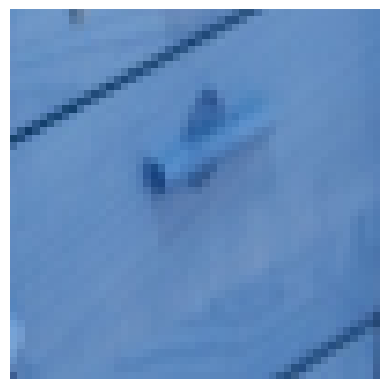

In [ ]:
# Load and display the image
# img = mpimg.imread(padded_images_array[0])
plt.imshow(resized_images[-1])
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

#Training

##Training graph

In [ ]:
#import to visualize success
import seaborn as sns
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 1)
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()

##Models

###Model #1

In [ ]:
print(target_size)

NameError: ignored

In [ ]:
# Define the CNN model #1
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0 to 9)
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the resized images and integer labels
epochs = 15
batch_size = 32
yorha=model.fit(resized_images_tensor, labels, epochs=epochs, batch_size=batch_size, validation_data = (validation_resized_images_tensor, validation_labels))


#see progression

plot_acc(yorha)

#Highest recorded 79.9% time per epoch 10

ValueError: ignored

###Model #2

Epoch 1/32
85/85 [==============================] - 20s 145ms/step - loss: 1.6636 - accuracy: 0.5737 - val_loss: 1.3913 - val_accuracy: 0.6032
Epoch 2/32
85/85 [==============================] - 10s 118ms/step - loss: 1.4581 - accuracy: 0.5821 - val_loss: 1.4193 - val_accuracy: 0.6032
Epoch 3/32
85/85 [==============================] - 10s 120ms/step - loss: 1.4378 - accuracy: 0.5821 - val_loss: 1.4228 - val_accuracy: 0.6032
Epoch 4/32
85/85 [==============================] - 10s 117ms/step - loss: 1.4249 - accuracy: 0.5821 - val_loss: 1.3163 - val_accuracy: 0.6032
Epoch 5/32
85/85 [==============================] - 10s 116ms/step - loss: 1.4085 - accuracy: 0.5821 - val_loss: 1.5096 - val_accuracy: 0.6032
Epoch 6/32
85/85 [==============================] - 10s 115ms/step - loss: 1.3880 - accuracy: 0.5901 - val_loss: 1.4498 - val_accuracy: 0.5945
Epoch 7/32
85/85 [==============================] - 10s 115ms/step - loss: 1.3418 - accuracy: 0.6012 - val_loss: 1.2801 - val_accuracy: 0.6119

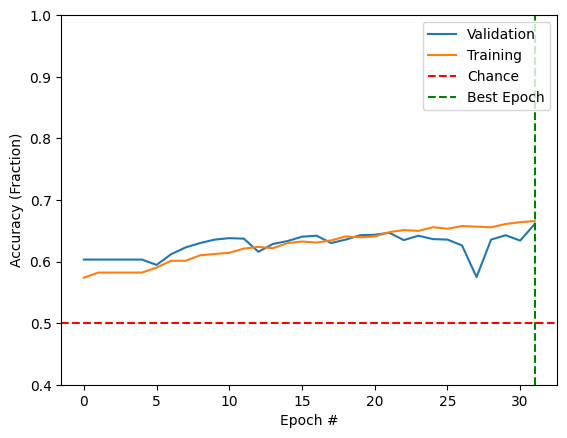

In [ ]:
 # Define the CNN model #2
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    MaxPooling2D((2, 2)),#takes highest gradiant. Num
    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D((2, 2)),#takes highest gradiant. Num
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),#takes highest gradiant. Num
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),#takes highest gradiant. Num
    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),#takes highest gradiant. Num
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0 to 9)
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the resized images and integer labels
epochs = 32
batch_size = 64
A1=model.fit(resized_images_tensor, labels, epochs=epochs, batch_size=batch_size, validation_data = (validation_resized_images_tensor, validation_labels))



plot_acc(A1)

#Highest recorded 66.7% time per epoch 10

###Model #3

Epoch 1/15
169/169 [==============================] - 14s 66ms/step - loss: 1.5467 - accuracy: 0.5720 - val_loss: 1.3071 - val_accuracy: 0.6032
Epoch 2/15
169/169 [==============================] - 11s 68ms/step - loss: 1.4338 - accuracy: 0.5821 - val_loss: 1.3095 - val_accuracy: 0.6032
Epoch 3/15
169/169 [==============================] - 11s 64ms/step - loss: 1.3986 - accuracy: 0.5856 - val_loss: 1.2745 - val_accuracy: 0.6079
Epoch 4/15
169/169 [==============================] - 11s 64ms/step - loss: 1.2874 - accuracy: 0.6036 - val_loss: 1.1470 - val_accuracy: 0.6300
Epoch 5/15
169/169 [==============================] - 11s 64ms/step - loss: 1.2092 - accuracy: 0.6185 - val_loss: 1.1699 - val_accuracy: 0.6237
Epoch 6/15
169/169 [==============================] - 10s 62ms/step - loss: 1.1716 - accuracy: 0.6278 - val_loss: 1.2604 - val_accuracy: 0.6261
Epoch 7/15
169/169 [==============================] - 11s 62ms/step - loss: 1.1546 - accuracy: 0.6339 - val_loss: 1.0849 - val_accuracy:

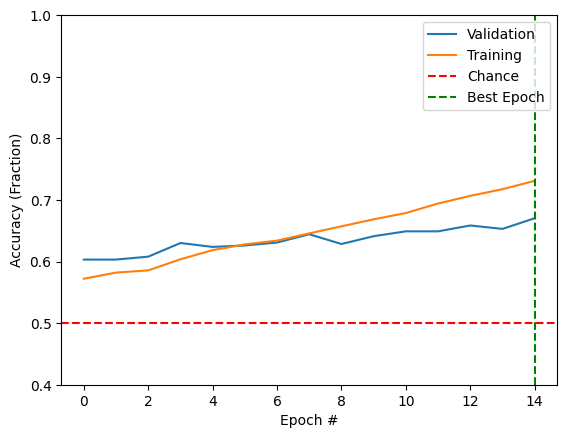

In [ ]:
 # Define the CNN model #3
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation="relu"),
    Dense(10, activation='softmax')  # 10 classes (0 to 9)
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the resized images and integer labels
epochs = 15
batch_size = 32
yorha=model.fit(resized_images_tensor, labels, epochs=epochs, batch_size=batch_size, validation_data = (validation_resized_images_tensor, validation_labels))


#see progression

plot_acc(yorha)

#Highest recorded 79.9% and 67% (val_acc) time per epoch 11

###Model #4

Epoch 1/40
85/85 [==============================] - 14s 120ms/step - loss: 1.5101 - accuracy: 0.5737 - val_loss: 1.2952 - val_accuracy: 0.6071
Epoch 2/40
85/85 [==============================] - 10s 118ms/step - loss: 1.3369 - accuracy: 0.5943 - val_loss: 1.1491 - val_accuracy: 0.6261
Epoch 3/40
85/85 [==============================] - 10s 118ms/step - loss: 1.2604 - accuracy: 0.6107 - val_loss: 1.1837 - val_accuracy: 0.6308
Epoch 4/40
85/85 [==============================] - 10s 117ms/step - loss: 1.1962 - accuracy: 0.6291 - val_loss: 1.1134 - val_accuracy: 0.6443
Epoch 5/40
85/85 [==============================] - 10s 115ms/step - loss: 1.1717 - accuracy: 0.6330 - val_loss: 1.1820 - val_accuracy: 0.6300
Epoch 6/40
85/85 [==============================] - 10s 115ms/step - loss: 1.1366 - accuracy: 0.6358 - val_loss: 1.1090 - val_accuracy: 0.6387
Epoch 7/40
85/85 [==============================] - 11s 127ms/step - loss: 1.1018 - accuracy: 0.6484 - val_loss: 1.1283 - val_accuracy: 0.6538

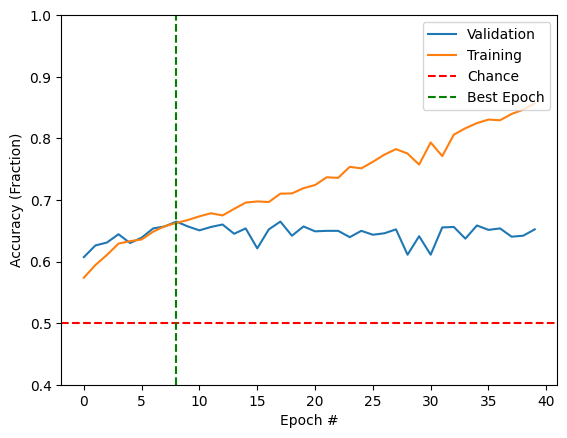

In [ ]:
# Define the CNN model #4
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32,activation="relu"),
    Dense(10, activation='softmax')  # 10 classes (0 to 9)
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the resized images and integer labels
epochs = 40
batch_size = 64
yorha=model.fit(resized_images_tensor, labels, epochs=epochs, batch_size=batch_size, validation_data = (validation_resized_images_tensor, validation_labels))


#see progression

plot_acc(yorha)

#Highest recorded % 85(test) and  65(val_acc) time per epoch 10

###Model #5

Epoch 1/15
337/337 [==============================] - 20s 47ms/step - loss: 1.4424 - accuracy: 0.5782 - val_loss: 1.5317 - val_accuracy: 0.4791
Epoch 2/15
337/337 [==============================] - 16s 48ms/step - loss: 1.3073 - accuracy: 0.5979 - val_loss: 1.1604 - val_accuracy: 0.6119
Epoch 3/15
337/337 [==============================] - 15s 45ms/step - loss: 1.2077 - accuracy: 0.6168 - val_loss: 1.1185 - val_accuracy: 0.6498
Epoch 4/15
337/337 [==============================] - 15s 44ms/step - loss: 1.1407 - accuracy: 0.6310 - val_loss: 1.0672 - val_accuracy: 0.6403
Epoch 5/15
337/337 [==============================] - 14s 42ms/step - loss: 1.0955 - accuracy: 0.6449 - val_loss: 1.1128 - val_accuracy: 0.6458
Epoch 6/15
337/337 [==============================] - 15s 44ms/step - loss: 1.0584 - accuracy: 0.6603 - val_loss: 1.0865 - val_accuracy: 0.6324
Epoch 7/15
337/337 [==============================] - 15s 43ms/step - loss: 1.0151 - accuracy: 0.6743 - val_loss: 1.1549 - val_accuracy:

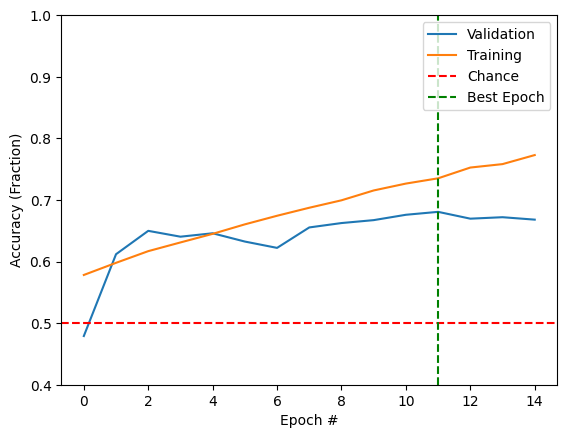

In [ ]:
# Define the CNN model #5
from keras.layers import Dropout
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.15),
    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.15),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0 to 9)
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the resized images and integer labels
epochs = 15
batch_size = 16#???
yorha=model.fit(resized_images_tensor, labels, epochs=epochs, batch_size=batch_size, validation_data = (validation_resized_images_tensor, validation_labels))


#see progression

plot_acc(yorha)

#Highest recorded  77% (test) and  0.67% (val_acc) time per epoch 16

In [ ]:
#epoch size of 14 is consintently the best with a bach of 32 but gives low test vals arround 64%

###Model #6

In [ ]:
#Define the CNN model #6
from keras.layers import Dropout
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.14),
    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D((2, 2)),
   Dropout(0.2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.10),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0 to 9)
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the resized images and integer labels
epochs = 1
batch_size = 8#???
yorha=model.fit(resized_images_tensor, labels, epochs=epochs, batch_size=batch_size, validation_data = (validation_resized_images_tensor, validation_labels))


#see progression

plot_acc(yorha)

#Highest recorded  77% (test) and  0.67% (val_acc) time per epoch 18

ValueError: ignored

###Model #7

In [ ]:
#Define the CNN model #7
from keras.layers import Dropout
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D((2, 2)),
   Dropout(0.30),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.400),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0 to 9)
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the resized images and integer labels
epochs = 40
batch_size = 8#???
yorha=model.fit(resized_images_tensor, labels, epochs=epochs, batch_size=batch_size, validation_data = (validation_resized_images_tensor, validation_labels))


#see progression

plot_acc(yorha)

#Highest recorded  78% (test) and  0.68% (val_acc) time ish 17secs

ValueError: ignored

###Model #8

In [ ]:
#Define the CNN model #8
from keras.layers import Dropout
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (7, 7), activation='relu'),
    MaxPooling2D((2, 2)),
   Dropout(0.30),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.400),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0 to 9)
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the resized images and integer labels
epochs = 40
batch_size = 8#???
yorha=model.fit(resized_images_tensor, labels, epochs=epochs, batch_size=batch_size, validation_data = (validation_resized_images_tensor, validation_labels))


#see progression

plot_acc(yorha)


#Highest recorded  78% (test) and  0.6901% (val_acc) time ish 17secs

ValueError: ignored

##Download Model

In [ ]:
#save model
from keras.models import load_model
import joblib

model.save("yorha1.h5")

#Prediction

In [ ]:
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf

# Defining vars
labels = ["closed door", "Door", "cabinetDoor", "refrigeratorDoor", "window", "chair", "table", "cabinet", "sofa", "pole"]
frame_counter = 0  # Initialize a frame counter
model_frequency = 5  # use the img every 5 frames
model = tf.keras.models.load_model("yorha1.h5")
cap = cv2.VideoCapture(0)  #0 = first cam


#page build
st.title("Object Identification AI")


#Get and show
while True:
    ret, frame = cap.read()  # Read a frame from the camera

    if not ret:
        st.error("Check thy current camera because, it appaers that we art getting thy signals from a camera situated in another dimension")
        break

    frame_counter += 1  # Increment the frame counter

    #Get the img from live feed
    if frame_counter % model_frequency == 0:

        #make sure it's appropiate dimentions
        image = cv2.resize(frame, (150, 150), interpolation=cv2.INTER_LINEAR)

        #Recomendation from GPT check
        # if image.shape[2] == 1:
        #     image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        # image = np.expand_dims(image, axis=0)

        # st.image(image, caption="Resized Image (150x150)", use_column_width=True)

        #predictions
        predictions = model.predict(image)

        top_prediction = labels[np.argmax(predictions)]

        st.write(f"It's a .... {top_predicion}")







# Release the VideoCapture object and close the Streamlit app
cap.release()
st.stop()


#Deployment (not done)